In [113]:
from pynq import Overlay

import struct
import binascii

import random   
import cmath
import numpy as np

import matplotlib.pyplot as plt

In [114]:
X_ADDRESS = 0x10
Y_ADDRESS = 0x18
R_ADDRESS = 0x20
THETA_ADDRESS = 0x30

In [115]:
ol = Overlay('./cordic.bit')

In [116]:
cart2pol_ip = ol.cordiccart2pol_0

In [117]:
x=0.6323
y=-0.2785
print(cmath.polar(complex(x,y)))

(0.6909164493627287, -0.4148884123756094)


In [118]:
x=(struct.unpack('<I', struct.pack('<f', x))[0])
y=(struct.unpack('<I', struct.pack('<f', y))[0])

In [119]:
print(x,y)

1059184234 3197015949


In [120]:
cart2pol_ip.write(X_ADDRESS,x)
cart2pol_ip.write(Y_ADDRESS,y)

In [146]:
r=cart2pol_ip.read(R_ADDRESS)
theta=cart2pol_ip.read(THETA_ADDRESS)

In [147]:
print(r,theta)

1060067226 3218115743


In [148]:
r = (struct.unpack('<f', struct.pack('<I', r))[0])
theta = (struct.unpack('<f', struct.pack('<I', theta))[0])

In [149]:
print(r,theta)

0.6849304437637329 -1.6292914152145386


In [154]:
def cart2pol(x, y):
    
    # 数据类型转换
    x = (struct.unpack('<I', struct.pack('<f', x))[0])
    y = (struct.unpack('<I', struct.pack('<f', y))[0])
    
    # 写入直角坐标
    cart2pol_ip.write(X_ADDRESS,x)
    cart2pol_ip.write(Y_ADDRESS,y)
    
    # 返回极坐标
    r = cart2pol_ip.read(R_ADDRESS)
    theta = cart2pol_ip.read(THETA_ADDRESS)
    
    #数据类型转换
    
    r = (struct.unpack('<f', struct.pack('<I', r))[0])
    theta = (struct.unpack('<f', struct.pack('<I', theta))[0])
        
    return r, theta

In [155]:
x=0.6323
y=-0.2785

In [156]:
 r, theta = cart2pol(x, y)

In [157]:
print(r,theta)

0.6906288266181946 -0.41488680243492126


## 测试

In [158]:
NUM_SAMPLES = 50

r_actual = np.zeros(NUM_SAMPLES)
theta_actual = np.zeros(NUM_SAMPLES)
r_predicted = np.zeros(NUM_SAMPLES)
theta_predicted = np.zeros(NUM_SAMPLES)

In [159]:
for i in range(NUM_SAMPLES):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
     
    r_actual[i], theta_actual[i] = cmath.polar(complex(x,y))
    r_predicted[i], theta_predicted[i] = cart2pol(x, y)
    print(r_actual[i], r_predicted[i], theta_actual[i], theta_predicted[i])

1.2116024209013692 1.2110978364944458 2.3831394969778925 2.3831241130828857
0.44634790387373624 0.4461619555950165 1.6311906989684806 1.6311835050582886
0.9398463843467882 0.9394548535346985 1.5240344683444014 1.5240200757980347
0.36625036548810963 0.3660978376865387 1.8916811507837714 1.891672968864441
0.7304800674124599 0.730175793170929 1.3588935331289655 1.3589054346084595
0.77770245496931 0.777378499507904 0.9167947765230071 0.9167799949645996
0.5429407198857559 0.5427146553993225 2.93794853314092 2.937941312789917
0.6864813143843325 0.6861952543258667 1.0921234795668333 1.092147946357727
0.6966688350843476 0.6963785290718079 -2.3337282610837193 -2.3337204456329346
0.880153889313723 0.8797872066497803 -1.0303342132776834 -1.0303395986557007
0.7697959608045644 0.7694752216339111 -2.252299166027658 -2.2522761821746826
0.5878196470361717 0.58757483959198 -2.2417650563950016 -2.241778612136841
1.2350178377851395 1.2345036268234253 -2.2991012652742446 -2.2991316318511963
0.269003406206

In [160]:
r_diff=np.subtract(r_actual,r_predicted)
r_square=np.square(r_diff)
r_mse=r_square.mean()
r_rmse=np.sqrt(r_mse)

In [161]:
theta_diff=np.subtract(theta_actual,theta_predicted)
theta_square=np.square(theta_diff)
theta_mse=theta_square.mean()
theta_rmse=np.sqrt(theta_mse)

In [162]:
print("Radius RMSE: ", r_rmse, "Theta RMSE:", theta_rmse)    
if r_rmse<0.001 and theta_rmse<0.001:
    print("PASS")
else:
    print("FAIL")

Radius RMSE:  0.00031549429510718363 Theta RMSE: 1.7790896036795567e-05
PASS


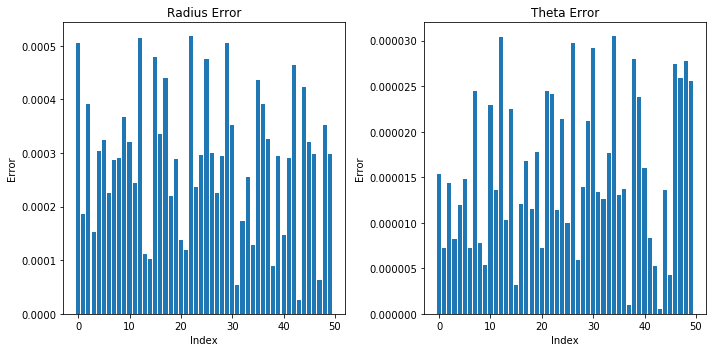

In [163]:
ind=np.arange(NUM_SAMPLES)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,abs(r_diff))
plt.title("Radius Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,abs(theta_diff))
plt.title("Theta Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()